<a href="https://colab.research.google.com/github/Mattinator1234/K769/blob/main/pipe_drainage_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Pipe Drainage Calculation
import math

# Given data
initial_pressure_barg = 13  # Initial pressure in the pipes (barg)
outlet_pressure_barg = 5  # Pressure at the outlet (barg)
pump_pressure_barg = 10  # Pump pressure (barg)
pump_flow_lpm = 50  # Pump flow rate (LPM)
outflow_lpm = 892  # Outflow rate at the outlet (LPM)




In [46]:
# Pipe dimensions (diameter in mm, length in m)
pipes = [
    (80, 0.634),
    (100, 49.8),
    (100, 144.4),
    (100, 136.7),
    (100, 58.6)
]



In [47]:
# Convert diameter to meters and calculate volume of each pipe
def calculate_pipe_volume(diameter_mm, length_m):
    radius_m = (diameter_mm / 1000) / 2  # Convert to meters and find radius
    volume_m3 = math.pi * (radius_m ** 2) * length_m  # Cylinder volume formula
    return volume_m3



In [48]:
# Calculate volumes for each pipe
pipe_volumes = [calculate_pipe_volume(d, l) for d, l in pipes]



In [49]:
# Sum total volume in cubic meters
total_volume_m3 = sum(pipe_volumes)



In [50]:
# Convert total volume from cubic meters to liters
total_volume_liters = total_volume_m3 * 1000  # 1 m³ = 1000 liters



In [51]:
# Time step configuration
dt = 1  # Time step in seconds
num_steps = 10000  # Large value to ensure complete simulation
pressure = initial_pressure_barg  # Start at initial pressure
volume_remaining = total_volume_liters  # Total liquid volume in the pipe
time_points = []
pressure_points = []
flow_points = []



In [52]:
# Iteratively calculate pressure drop and flow reduction over time
for t in range(num_steps):
    # Bernoulli-based estimate: Flow rate decreases as pressure drops
    flow_out = outflow_lpm * (pressure / initial_pressure_barg)  # Adjusting flow dynamically

    # Ensure flow out does not exceed available volume
    if volume_remaining < flow_out * (dt / 60):
        flow_out = volume_remaining * (60 / dt)  # Adjust to drain completely

    # Net volume change
    volume_remaining -= (flow_out - pump_flow_lpm) * (dt / 60)  # Convert LPM to volume per second

    # Pressure decrease proportional to volume loss
    pressure = outlet_pressure_barg + (initial_pressure_barg - outlet_pressure_barg) * (volume_remaining / total_volume_liters)

    # Stop if the system is empty
    if volume_remaining <= 0:
        break

    # Store values for plotting
    time_points.append(t)
    pressure_points.append(pressure)
    flow_points.append(flow_out)

In [53]:
# Convert lists to numpy arrays
time_points = np.array(time_points)
pressure_points = np.array(pressure_points)
flow_points = np.array(flow_points)


In [54]:
# Filter values to only show up to 1500 seconds
mask = time_points <= 1500
time_filtered = time_points[mask]
pressure_filtered = pressure_points[mask]
flow_filtered = flow_points[mask]

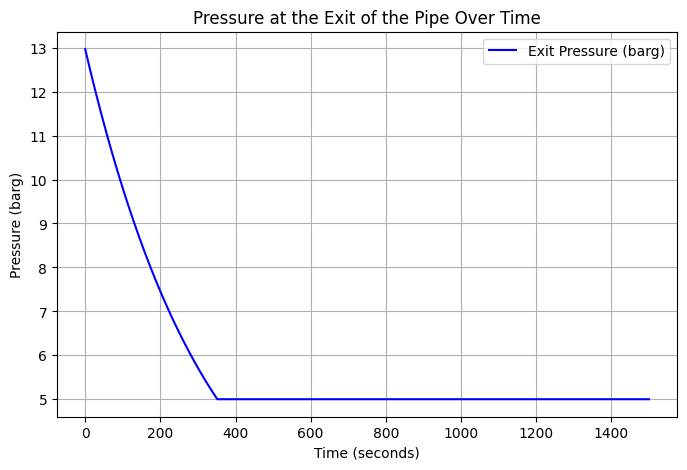

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Plot updated Pressure at Exit Over Time
plt.figure(figsize=(8, 5))
plt.plot(time_filtered, pressure_filtered, label="Exit Pressure (barg)", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Pressure (barg)")
plt.title("Pressure at the Exit of the Pipe Over Time")
plt.legend()
plt.grid(True)
plt.show()

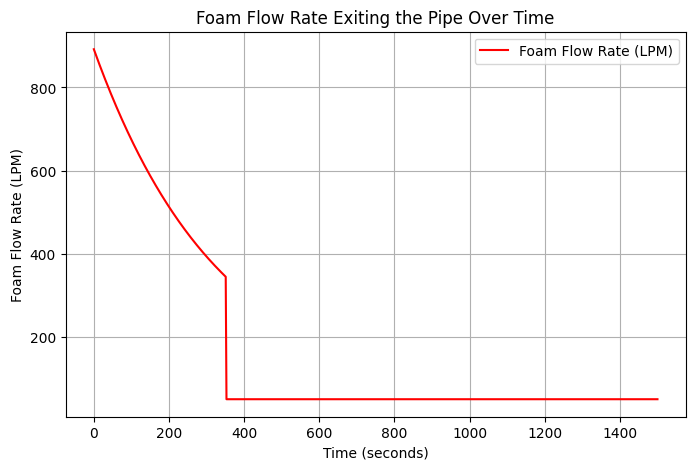

In [56]:
# Plot updated Foam Flow Rate Over Time
plt.figure(figsize=(8, 5))
plt.plot(time_filtered, flow_filtered, label="Foam Flow Rate (LPM)", color="red")
plt.xlabel("Time (seconds)")
plt.ylabel("Foam Flow Rate (LPM)")
plt.title("Foam Flow Rate Exiting the Pipe Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Time when the system is completely drained
time_drained = time_points[-1]
print(f"The system is completely drained after {time_drained} seconds (~{time_drained / 60:.2f} minutes).")

The system is completely drained after 9999 seconds (~166.65 minutes).


In [58]:
# Print the time when flow reaches 325 LPM
if flow_325_time is not None:
    print(f"The flow rate reaches 325 LPM at {flow_325_time} seconds.")
else:
    print("Flow rate did not reach exactly 325 LPM in the simulation.")

The flow rate reaches 325 LPM at 566 seconds.


In [59]:
# Function to get flow rate and pressure at a given time
def get_flow_and_pressure_at_time(query_time):
    """
    Returns the flow rate (LPM) and pressure (barg) at a specific time in the simulation.

    Parameters:
        query_time (float): Time in seconds for which to retrieve the values.

    Returns:
        (float, float): Flow rate (LPM) and pressure (barg) at the given time.
    """
    # Ensure the queried time is within the simulation range
    if query_time < 0 or query_time > time_points[-1]:
        return "Time is out of range. Choose a time between 0 and {:.2f} seconds.".format(time_points[-1])

    # Find the closest time index
    closest_index = np.abs(time_points - query_time).argmin()

    # Retrieve the corresponding values
    flow_at_time = flow_points[closest_index]
    pressure_at_time = pressure_points[closest_index]

    return f"At {query_time} seconds:\n - Flow Rate: {flow_at_time:.2f} LPM\n - Pressure: {pressure_at_time:.2f} barg"

# Example usage
query_time = 30  # Change this value to check another time
print(get_flow_and_pressure_at_time(query_time))

At 30 seconds:
 - Flow Rate: 819.71 LPM
 - Pressure: 11.91 barg
